# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *Ivanov Alexander*</center>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy
import scipy.io
from numpy import linalg as LA
%matplotlib inline

In [2]:
data = scipy.io.loadmat('network1.mat')
A1 = data['A'].astype('float')
data = scipy.io.loadmat('network2.mat')
A2 = data['A'].astype('float')
data = scipy.io.loadmat('network3.mat')
A3 = data['A'].astype('float')

In [3]:
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()

In [4]:
M1 = MCL(A1, 0.05, 2, 2)
M1

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [5]:
M2 = MCL(A2, 0.1, 2, 2)
M2

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [6]:
M3 = MCL(A3, 0.04, 2, 2)
M3

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [43]:
from numpy import linalg as LA

data = scipy.io.loadmat('music_data.mat')
A = data['A'].astype('float')
G = nx.from_scipy_sparse_matrix(A)
L = nx.normalized_laplacian_matrix(G)
L = L.toarray()

def srpa(G):
    L = nx.normalized_laplacian_matrix(G)
    L = L.toarray()
    w,v = LA.eig(L)
    
    j = 0
    while(w[j]*10000 < 0):
        j += 1
        
    list1 = []
    list2 = []
        
    for i in range(len(v[j])):
        if v[j][i] > 0:
            list1.append(i)
        else:
            list2.append(i)
    
    G1 = G.subgraph(list1)
    G2 = G.subgraph(list2)
    
    return [G1, G2]
    

In [45]:
listG = [G]
newlistG = []

for i in range(3):
    newlistG = []
    for j in range(len(listG)):
        G1, G2 = srpa(listG[j])
        newlistG.append(G1)
        newlistG.append(G2)
        
    listG = newlistG

In [55]:
def naming(G):
    indxs = G.nodes()
    for i in range(len(indxs)):
        G.node[indxs[i]]['artist'] = data['artists'][G.nodes()[i]]

In [82]:
GtoDraw = listG[0]
label = {}
for i in range(len(GtoDraw.nodes())):
    label[GtoDraw.nodes()[i]] =  data['artists'][GtoDraw.nodes()[i]]

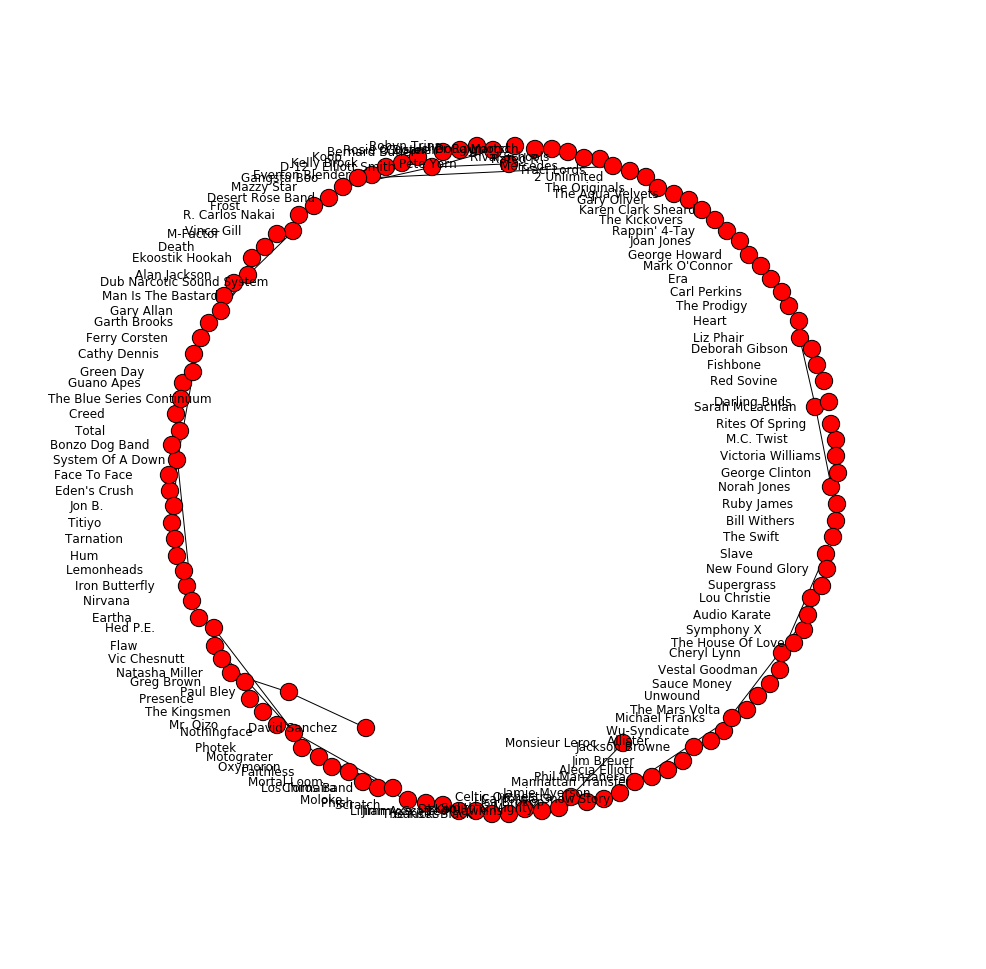

In [86]:
plt.figure(figsize=(13,13)) 
nx.draw(GtoDraw, labels= label)

Finally, I know only three bands from this list. This is System of A Down, Green Day and Nirvana. And I can say this bands play alternative rock. Intersting fact that all this three bands are very close in the graph. But let's look in another side of our circle graph.  For instance, the bands Audio Karate, Symphony X and Supergrass. Audio Karate plays indie rock, Symphony X --- metal and Supergrass --- alternative rock. So generally we can conclude with the fact that this is claster of rock and metal bands.